In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.tokenize import word_tokenize

#perform doc2vec embeddings on comments with gensim
#ensure nltk.download('punkt') and nltk.download('punkt_tab') have been downloaded
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import matplotlib.pyplot as plt

n_samples = 1000

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
sample_data = data['text'][:n_samples]

In [10]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [11]:
max_epochs = 10
#embedding dimension should be 100-300 or so. can tune
vec_size = 50
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 Model Saved


In [12]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("inferred docvector for 'hello how are you': ", v1)

print("most similar docvectors to '1': ",model.dv.most_similar('1'))

print("docvector of '1': ",model.dv['1'])

inferred docvector for 'hello how are you':  [-0.08244643 -0.06485629 -0.09417207  0.01641162  0.06412759 -0.0656733
  0.11041009  0.23801908 -0.18594697 -0.06936826 -0.15549676 -0.14474508
  0.14899959  0.18373452  0.01374137  0.0573536   0.11359508  0.06121281
 -0.1091492  -0.12526391  0.13904615  0.19871901  0.27060005 -0.06689492
  0.08471055  0.10792875  0.04221964 -0.02972808 -0.12028424  0.07846237
 -0.07763133 -0.04979799 -0.03449947 -0.10337312 -0.05726856  0.01192793
  0.18446067 -0.04257713 -0.02630973 -0.04241204  0.06756508 -0.08017172
  0.06585556 -0.00410424  0.24537571  0.04906313 -0.04515721 -0.0604903
  0.1210244   0.09570961]
most similar docvectors to '1':  [('507', 0.7261145114898682), ('476', 0.7111737728118896), ('145', 0.6875054240226746), ('294', 0.6763745546340942), ('602', 0.6743664741516113), ('758', 0.6688320636749268), ('931', 0.6630890965461731), ('595', 0.6515992879867554), ('277', 0.6447167992591858), ('629', 0.6400967836380005)]
docvector of '1':  [-1.

In [153]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [154]:
list(doc_vectors.values())[0]

array([ 0.08841321, -0.23490797, -0.05273242, -0.5459988 ,  0.2584467 ,
        0.09306275,  0.369235  ,  0.38599697, -0.19796973, -0.26790255,
       -0.6418026 ,  0.0630002 , -0.07613426,  0.6857589 , -0.5216036 ,
        0.03688675,  0.13580228, -0.37718284,  0.29829088,  0.32671675,
        0.6120802 ,  0.1574222 , -0.285689  , -0.30141458,  0.63605636,
        0.45890033, -0.15718319, -0.24054012, -0.4258136 ,  0.28086323,
       -0.7854319 ,  0.5566361 ,  0.20817915,  0.22391991,  0.28024703,
       -0.3701775 , -0.2005987 ,  0.21836175,  0.33593142, -0.50670666,
        0.62240416, -0.00128334, -0.78982854,  0.03108329, -0.03407831,
       -0.85280716, -0.6943284 , -0.3075424 ,  0.8842594 ,  0.4010431 ],
      dtype=float32)

In [121]:
#perform k-means clustering on embedded documents

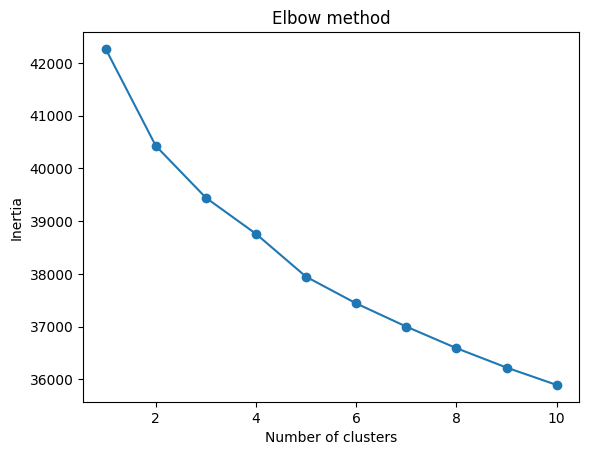

In [155]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [156]:
num_clusters = 5
cluster_indices = [i for i in range(num_clusters)]

In [157]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=5)

In [103]:
#find centroids. compute bigram closest to centroid

In [158]:
centroids  = kmeans.cluster_centers_; centroids

array([[-0.02139814, -0.09609593, -0.2144808 , -0.48909922, -0.14696351,
         0.04705083, -0.10487952, -0.00388589, -0.53331865,  0.14625839,
        -0.29650477,  0.03930153,  0.18682124,  0.27427013, -0.28852428,
         0.03204113, -0.23580052,  0.17963077, -0.00635053, -0.01946981,
         0.10489358,  0.14312142, -0.07323634, -0.12507736,  0.11837821,
         0.00797325,  0.20444279,  0.02791721, -0.25090857,  0.17878022,
        -0.62170787, -0.02984943,  0.13900688,  0.08685246,  0.31254766,
        -0.27627487, -0.2894651 ,  0.03804654,  0.10084385, -0.10928268,
         0.85710941, -0.15684213, -0.34327673, -0.27443531, -0.02699306,
         0.09605712, -0.3751111 , -0.4657205 ,  0.73861407,  0.51919409],
       [-0.02789936, -0.14555575, -0.08641035, -0.17940027, -0.06736809,
        -0.07922353, -0.04158419,  0.19690043, -0.15884699, -0.09994268,
        -0.26916788,  0.10224537,  0.01045142,  0.32012491, -0.24430898,
         0.0906502 ,  0.01506919, -0.19703315, -0.

In [159]:
#compute distances between centroids
centroid_dists = sum([[np.linalg.norm(centroids[i]-centroids[j]) for j in range(i+1,num_clusters)] for i in range(num_clusters)],[]); centroid_dists

[1.1704277195781763,
 1.3373457673396927,
 1.4827011398061392,
 1.1940693272934606,
 0.933735340015344,
 1.0475608154420104,
 0.9463845844159807,
 1.324913208312707,
 0.9584375959466346,
 1.1315114770691295]

In [160]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(list(doc_vectors.values()))
explained_variance = pca.explained_variance_ratio_

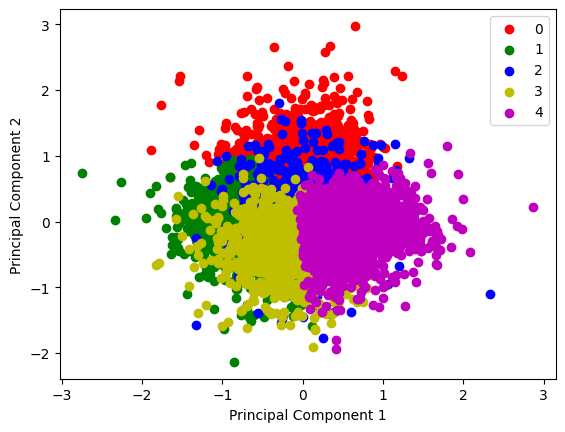

In [161]:
# plot the first two principal components with labels
pca_labeled = list(zip(pca_fit,kmeans.labels_))
colors = ["r", "g", "b", "y","m"]
for index, color in zip(cluster_indices, colors):
    pca_fit_cluster = [pt[0] for pt in pca_labeled if pt[1] == index]
    pca_fit_i_x = np.array(pca_fit_cluster).transpose()[0]
    pca_fit_i_y = np.array(pca_fit_cluster).transpose()[1]
    plt.scatter(pca_fit_i_x, pca_fit_i_y, color=color, label=index)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [145]:
#a selection of poliical words 
political_keywords = list(pd.read_csv("political_keywords.csv"))

In [146]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_keywords)):
    for j in range(i+1,len(political_keywords)):
        bigrams.append(political_keywords[i] + " " + political_keywords[j])

In [110]:
#get a list of political bigrams directly
political_bigrams = list(pd.read_csv("political_bigrams.csv"))

In [111]:
political_bigrams[:10]

['economic policy',
 'foreign affairs',
 'national security',
 'civil rights',
 'social justice',
 'tax reform',
 'health care',
 'immigration law',
 'gun control',
 'climate change']

In [147]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in political_bigrams}

In [148]:
list(bigram_vecs.values())[0]

array([ 0.1292554 ,  0.05221849,  0.07467505, -0.03621169, -0.14072654,
       -0.24994045, -0.16251802,  0.02739681,  0.23220694,  0.02500964,
        0.16663796,  0.03592148, -0.05315223,  0.13791613,  0.04794726,
        0.13876547, -0.01018192, -0.07261224,  0.11366235,  0.14859731,
        0.1520435 ,  0.11433718,  0.0168482 , -0.32030213,  0.07213355,
       -0.12928444, -0.03127538, -0.12272658, -0.16424702, -0.11031263,
        0.12099104,  0.2123381 ,  0.02284978, -0.02859081, -0.33915788,
       -0.11272372, -0.00236297,  0.04309709,  0.10848338, -0.07363451,
       -0.01764352,  0.20515478,  0.01593425, -0.27737254,  0.09052016,
       -0.12123673, -0.01928576,  0.09070715,  0.10008331,  0.31387082,
       -0.13439395, -0.21688212, -0.08595523, -0.02557238,  0.00177052,
       -0.07514016,  0.15676326,  0.2675356 , -0.13283148,  0.19238125,
       -0.1233586 ,  0.29895693, -0.20030178, -0.0540098 , -0.2545534 ,
        0.00853755, -0.0241829 , -0.20310432, -0.10479623,  0.05

In [114]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [149]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2**32
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        #dist = similarity(centroid, embedding)
        dist = np.linalg.norm(centroid - embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [150]:
nearest_bigram_to_centroid

[('international law', 0.6464107436525593),
 ('human rights', 0.34984701631629833),
 ('domestic policy', 1.1113556331623462),
 ('tax reform', 0.4704386652179738),
 ('federal government', 0.8560725165390126)]

In [133]:
for comment in sample_data[:10]:
    print(comment)

RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate
RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…
RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.
RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …
RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…
RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews
RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://…
Going on #MSNBC Live with @ThomasARoberts around 2 PM ET.  #GOPDebate
Deer in the headlights RT @lizzwinstea

In [29]:
#label the data with the appropriate label from k-means clustering
labeled_data = list(zip(sample_data,kmeans.labels_))

In [30]:
#separate documents by label. build vocabulary for each cluster
cluster_vocab = [[] for label in cluster_indices]
cluster_docs = [[] for label in cluster_indices]
for doc, label in labeled_data:
    cluster_vocab[label] += word_tokenize(doc.lower())
    cluster_docs[label].append(doc)

In [123]:
#METHOD 2) use word embeddings to compute distance from word to list of words, take closest words

In [31]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [32]:
nlp("hello").similarity(nlp("hi"))

0.5797264417406982

In [33]:
#define function which measures distance to a set of words using word embeddings and cosine similarity
def dist_to_wordset(keyword,wordset):
    return min([nlp(keyword).similarity(nlp(word)) for word in wordset])

In [34]:
dist_to_wordset(political_keywords[0],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_17452/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


-0.2748392664312949

In [38]:
#compute the political keyword with the closest distance
#this is essentially computing the Hausdorff distance between these two sets
def closest_keyword(keywords,wordset):
    max_dist = -2
    max_keyword = ""
    for keyword in keywords:
        dist = dist_to_wordset(keyword,wordset)
        if dist > max_dist:
            max_dist = dist
            max_keyword = keyword
    return (max_keyword,max_dist)

In [39]:
closest_keyword(political_keywords[:3],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_2309/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


('republic', -0.2577690642582492)

In [35]:
#METHOD 3: Use TF-IDF on each cluster to extract top two words
from sklearn.feature_extraction.text import TfidfVectorizer
def top_words_in_cluster(cluster_index,num_words=10):
    tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words='english')
    corpus_tfidf = tfidf_vectorizer.fit_transform(cluster_docs[cluster_index])
    tfidf_df = pd.DataFrame(corpus_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
    tfidf_scores = tfidf_df.sum(axis=0)
    return tfidf_scores.nlargest(n=num_words)

In [37]:
top_words_in_cluster(0)

http               20.486685
https               8.817792
trump               7.374561
night               6.819720
realdonaldtrump     4.549463
debate              4.495866
like                4.294735
megynkelly          3.936301
tcot                3.930416
gop                 3.620411
dtype: float64